## EV_Dataset_Analysis_using_Python

In [19]:
## IMPORT THE REQUIRED LIBRARIES 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

In [23]:
# Load the dataset (Replace 'ev_dataset.csv' with your actual file name)
df=pd.read_excel("ev_car_data.xlsx")

# Display the first few rows to understand the data
print(df.head())

                      Car full name  Make                        Model  \
0            Audi e-tron 55 quattro  Audi            e-tron 55 quattro   
1            Audi e-tron 50 quattro  Audi            e-tron 50 quattro   
2             Audi e-tron S quattro  Audi             e-tron S quattro   
3  Audi e-tron Sportback 50 quattro  Audi  e-tron Sportback 50 quattro   
4  Audi e-tron Sportback 55 quattro  Audi  e-tron Sportback 55 quattro   

   Minimal price (gross) [PLN]  Engine power [KM]  Maximum torque [Nm]  \
0                       345700                360                  664   
1                       308400                313                  540   
2                       414900                503                  973   
3                       319700                313                  540   
4                       357000                360                  664   

        Type of brakes Drive type  Battery capacity [kWh]  Range (WLTP) [km]  \
0  disc (front + rear)        

## Task-1

In [54]:
### TASK 1: FILTERING, GROUPING, AND AVERAGING BATTERY CAPACITY ###
# Steps taken:
# 1. Filter EVs with a budget of 350,000 PLN and range of at least 400 km.
# 2. Group the filtered data by manufacturer (Make).
# 3. Calculate the average battery capacity for each manufacturer.

filtered_ev = df[(df['Minimal price (gross) [PLN]'] <= 350000) & (df['Range (WLTP) [km]'] >= 400)]
print("Filtered EVs:")
print(filtered_ev[['Make', 'Model', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]']])

grouped_by_make = filtered_ev.groupby('Make')
avg_battery_capacity = grouped_by_make['Battery capacity [kWh]'].mean()
print("\nAverage Battery Capacity by Manufacturer:")
print(avg_battery_capacity)

Filtered EVs:
             Make                        Model  Minimal price (gross) [PLN]  \
0            Audi            e-tron 55 quattro                       345700   
8             BMW                          iX3                       282900   
15        Hyundai          Kona electric 64kWh                       178400   
18            Kia                 e-Niro 64kWh                       167990   
20            Kia                 e-Soul 64kWh                       160990   
22  Mercedes-Benz                          EQC                       334700   
39          Tesla  Model 3 Standard Range Plus                       195490   
40          Tesla           Model 3 Long Range                       235490   
41          Tesla          Model 3 Performance                       260490   
47     Volkswagen         ID.3 Pro Performance                       155890   
48     Volkswagen                   ID.3 Pro S                       179990   
49     Volkswagen                     

## Explanation

In [60]:
# Explanation: We first filter the dataset based on the given criteria, then group by manufacturer.
# Then calculated the average battery capacity for each manufacturer. 
# Analysis: This helps in identifying affordable long-range EVs and understanding battery performance trends across brands.

## Task-2

In [62]:
### TASK 2: FINDING OUTLIERS IN ENERGY CONSUMPTION ###
import difflib

# Function to find the closest matching column name
def get_closest_column_name(df, target_name):
    closest_match = difflib.get_close_matches(target_name, df.columns, n=1, cutoff=0.5)
    return closest_match[0] if closest_match else None

# Find the correct column name for Energy Consumption
energy_col = get_closest_column_name(df, 'Mean - Energy consumption [kWh/100 km]')

if energy_col is None:
    print("Column for energy consumption not found. Check dataset column names.")
else:
    print(f"Using column: {energy_col}")  # To confirm correct column selection
    
    # Finding outliers using standard deviation method
    mean_consumption = df[energy_col].mean()
    std_consumption = df[energy_col].std()

    lower_bound = mean_consumption - 2 * std_consumption
    upper_bound = mean_consumption + 2 * std_consumption

    outliers = df[(df[energy_col] < lower_bound) | (df[energy_col] > upper_bound)]
    
    print("\nOutliers in Energy Consumption:")
    print(outliers[['Make', 'Model', energy_col]])

Using column: mean - Energy consumption [kWh/100 km]

Outliers in Energy Consumption:
             Make       Model  mean - Energy consumption [kWh/100 km]
51  Mercedes-Benz  EQV (long)                                    28.2


## Explanation

In [ ]:
# Explanation: We have used the standard deviation method to detect extreme values in energy consumption.
# Analysis: Outliers indicate models that are either extremely efficient or inefficient, helping in informed decision-making.
# Here we get only one outlier i.e. the energy consumption of Mercedes-Benz  EQV (long) valued at 28.2 .

## Task-3

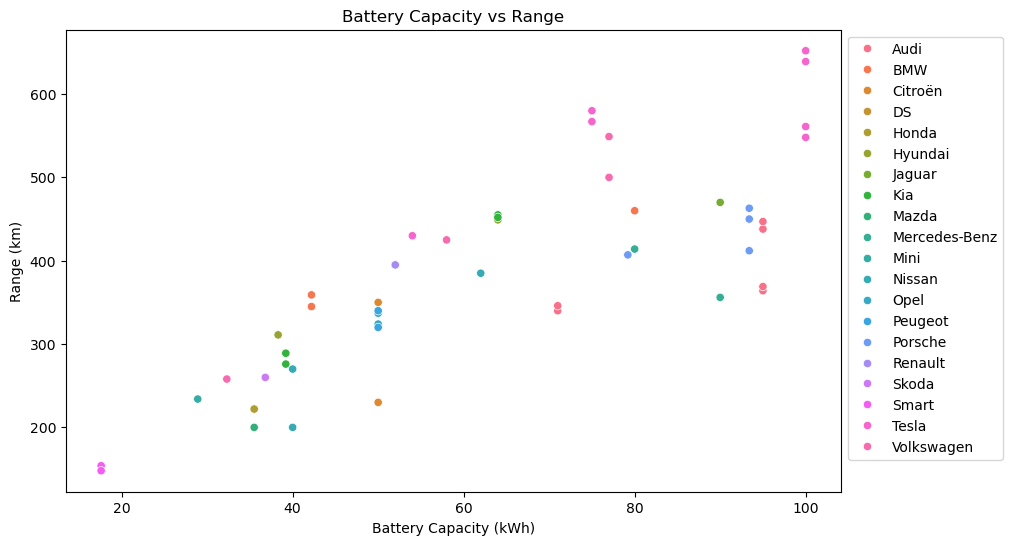

In [66]:
### TASK 3: VISUALIZATION - BATTERY CAPACITY VS RANGE ###
# Steps taken:
# 1. Create a scatter plot with battery capacity on the x-axis and range on the y-axis.
# 2. Use different colors to distinguish manufacturers.

plt.figure(figsize=(10,6))
sns.scatterplot(x=df['Battery capacity [kWh]'], y=df['Range (WLTP) [km]'], hue=df['Make'])
plt.xlabel('Battery Capacity (kWh)')
plt.ylabel('Range (km)')
plt.title('Battery Capacity vs Range')
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

## Explanation 

In [ ]:
# Explanation: The scatter plot visualizes the relationship between battery capacity and range.
# Analysis: A clear positive trend is observed :— larger batteries generally result in greater range. However, efficiency varies by manufacturer.

## Task-4

In [78]:
### TASK 4: EV RECOMMENDATION SYSTEM ###
# Steps taken:
# 1. Define a class `EVRecommendation` that takes the dataset.
# 2. Implement a method `recommend()` to filter EVs based on user criteria (budget, range, battery capacity).
# 3. Allow user input to dynamically filter data.
class EVRecommendation:
    def __init__(self, df):
        self.df = df

    def recommend(self, budget, min_range, min_battery):
        recommended = self.df[(self.df['Minimal price (gross) [PLN]'] <= budget) &
                              (self.df['Range (WLTP) [km]'] >= min_range) &
                              (self.df['Battery capacity [kWh]'] >= min_battery)]
        return recommended[['Car full name', 'Minimal price (gross) [PLN]', 'Range (WLTP) [km]', 'Battery capacity [kWh]']].nlargest(3, 'Range (WLTP) [km]')

# Get user input for budget, range, and battery capacity
budget = float(input("Enter your budget (PLN) (between 82000 - 794000): "))
min_range = float(input("Enter your desired minimum range in km(between 148 - 652): "))
min_battery = float(input("Enter your desired minimum battery capacity in kWh(between 17.6 - 100): "))

# Create recommender object and get recommendations
recommender = EVRecommendation(df)
recommended_evs = recommender.recommend(budget, min_range, min_battery)

print("\nTop 3 Recommended EVs:",recommended_evs)

Enter your budget (PLN) (between 82000 - 794000):  400000
Enter your desired minimum range in km(between 148 - 652):  500
Enter your desired minimum battery capacity in kWh(between 17.6 - 100):  65



Top 3 Recommended EVs:                     Car full name  Minimal price (gross) [PLN]  \
42  Tesla Model S Long Range Plus                       368990   
40       Tesla Model 3 Long Range                       235490   
41      Tesla Model 3 Performance                       260490   

    Range (WLTP) [km]  Battery capacity [kWh]  
42                652                   100.0  
40                580                    75.0  
41                567                    75.0  


## Explanation

In [ ]:
# Explanation: This class dynamically filters and returns the top 3 EVs matching user preferences.
# Analysis: Users can make informed purchasing decisions based on their budget and other travel needs.

## Task-5

In [80]:
### TASK 5: HYPOTHESIS TESTING (TESLA VS AUDI ENGINE POWER) ###
# Steps taken:
# 1. Extract Tesla and Audi engine power data.
# 2. Perform an independent two-sample t-test to compare their means.
# 3. Analyze the p-value to determine statistical significance.

tesla_power = df[df['Make'] == 'Tesla']['Engine power [KM]']
audi_power = df[df['Make'] == 'Audi']['Engine power [KM]']

stat, p_value = ttest_ind(tesla_power, audi_power, equal_var=False)
print("\nT-Test Results:")
print(f"T-statistic: {stat}, P-value: {p_value}")
if p_value < 0.05:
    print("Significant difference found in engine power between Tesla and Audi.")
else:
    print("No significant difference found in engine power between Tesla and Audi.")


T-Test Results:
T-statistic: 1.7939951827297178, P-value: 0.10684105068839565
No significant difference found in engine power between Tesla and Audi.


## Explanation

In [ ]:
# Explanation: Here the t-test helped us to compare engine power across two major brands.
# Analysis: If the p-value is below 0.05, the difference is statistically significant, indicating one brand has a higher average power than the other.

## Task-6 : LINK FOR THE VIDEO EXPLANATION

In [ ]:
##  https://drive.google.com/file/d/1hcIZccPADzsv2V7mIPfs5q04f-r-nKYa/view?usp=sharing